## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(columns=['EIN','NAME'])

In [4]:
# Determine the number of unique values in each column.
df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_types = df['APPLICATION_TYPE'].value_counts()
application_types

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = [index for index,row in application_types.items() if row < 500]

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_types = df['CLASSIFICATION'].value_counts()
classification_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
[[index,row] for index,row in classification_types.items() if row > 1]

[['C1000', 17326],
 ['C2000', 6074],
 ['C1200', 4837],
 ['C3000', 1918],
 ['C2100', 1883],
 ['C7000', 777],
 ['C1700', 287],
 ['C4000', 194],
 ['C5000', 116],
 ['C1270', 114],
 ['C2700', 104],
 ['C2800', 95],
 ['C7100', 75],
 ['C1300', 58],
 ['C1280', 50],
 ['C1230', 36],
 ['C1400', 34],
 ['C7200', 32],
 ['C2300', 32],
 ['C1240', 30],
 ['C8000', 20],
 ['C7120', 18],
 ['C1500', 16],
 ['C1800', 15],
 ['C6000', 15],
 ['C1250', 14],
 ['C8200', 11],
 ['C1238', 10],
 ['C1278', 10],
 ['C1235', 9],
 ['C1237', 9],
 ['C7210', 7],
 ['C2400', 6],
 ['C1720', 6],
 ['C4100', 6],
 ['C1257', 5],
 ['C1600', 5],
 ['C1260', 3],
 ['C2710', 3],
 ['C0', 3],
 ['C3200', 2],
 ['C1234', 2],
 ['C1246', 2],
 ['C1267', 2],
 ['C1256', 2]]

In [9]:
classification_types.mean()

483.0845070422535

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced with a mean of 483 i chose 500 as cutoff
# use the variable name `classifications_to_replace`
classifications_to_replace = [index for index,row in classification_types.items() if row < 500]

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(df[['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']])
processed_df = pd.concat([df[['STATUS', 'ASK_AMT']], dummies], axis=1)

In [60]:
# Split our preprocessed data into our features and target arrays
X = processed_df
y = df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

In [61]:
print(f"X_train Shape: {X_train.shape}, X_test Shape: {X_test.shape}")

X_train Shape: (27439, 44), X_test Shape: (6860, 44)


In [62]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# nn_model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(512, activation='tanh', input_shape = X_train_scaled[0].shape, kernel_regularizer='l1'),
#     tf.keras.layers.Dense(512//2, activation='tanh'),
#     tf.keras.layers.Dense(512//4, activation='tanh'),
#     tf.keras.layers.Dense(512//8, activation='tanh'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# nn_model.build()
# nn_model.summary()

In [80]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80,activation="tanh", input_dim=44))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation='tanh'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.build()
nn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 80)                3600      
                                                                 
 dense_32 (Dense)            (None, 30)                2430      
                                                                 
 dense_33 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'mse'])

In [82]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 75, validation_data=(X_test,y_test))

Epoch 1/40
858/858 [==============================] - 3s 3ms/step - loss: 0.5705 - accuracy: 0.7182 - mse: 0.1930 - val_loss: 0.7081 - val_accuracy: 0.4659 - val_mse: 0.2574
Epoch 2/40
858/858 [==============================] - 3s 3ms/step - loss: 0.5548 - accuracy: 0.7303 - mse: 0.1866 - val_loss: 0.7110 - val_accuracy: 0.4659 - val_mse: 0.2589
Epoch 3/40
858/858 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7301 - mse: 0.1856 - val_loss: 0.7468 - val_accuracy: 0.4659 - val_mse: 0.2760
Epoch 4/40
858/858 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7318 - mse: 0.1847 - val_loss: 0.7130 - val_accuracy: 0.4659 - val_mse: 0.2599
Epoch 5/40
858/858 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7305 - mse: 0.1843 - val_loss: 0.8149 - val_accuracy: 0.4659 - val_mse: 0.3060
Epoch 6/40
858/858 [==============================] - 2s 2ms/step - loss: 0.5476 - accuracy: 0.7313 - mse: 0.1838 - val_loss: 0.71

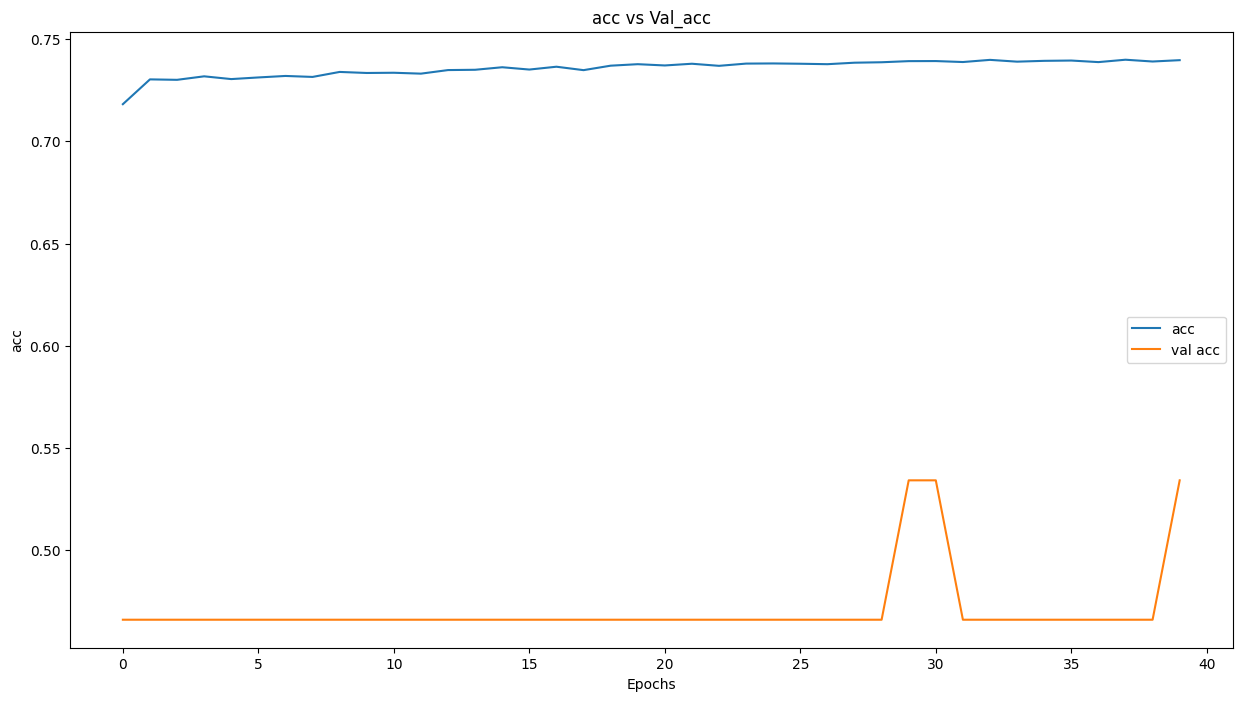

In [83]:
plt.figure(figsize=(15,8))
plt.plot(fit_model.history['accuracy'], label = 'acc')
plt.plot(fit_model.history['val_accuracy'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

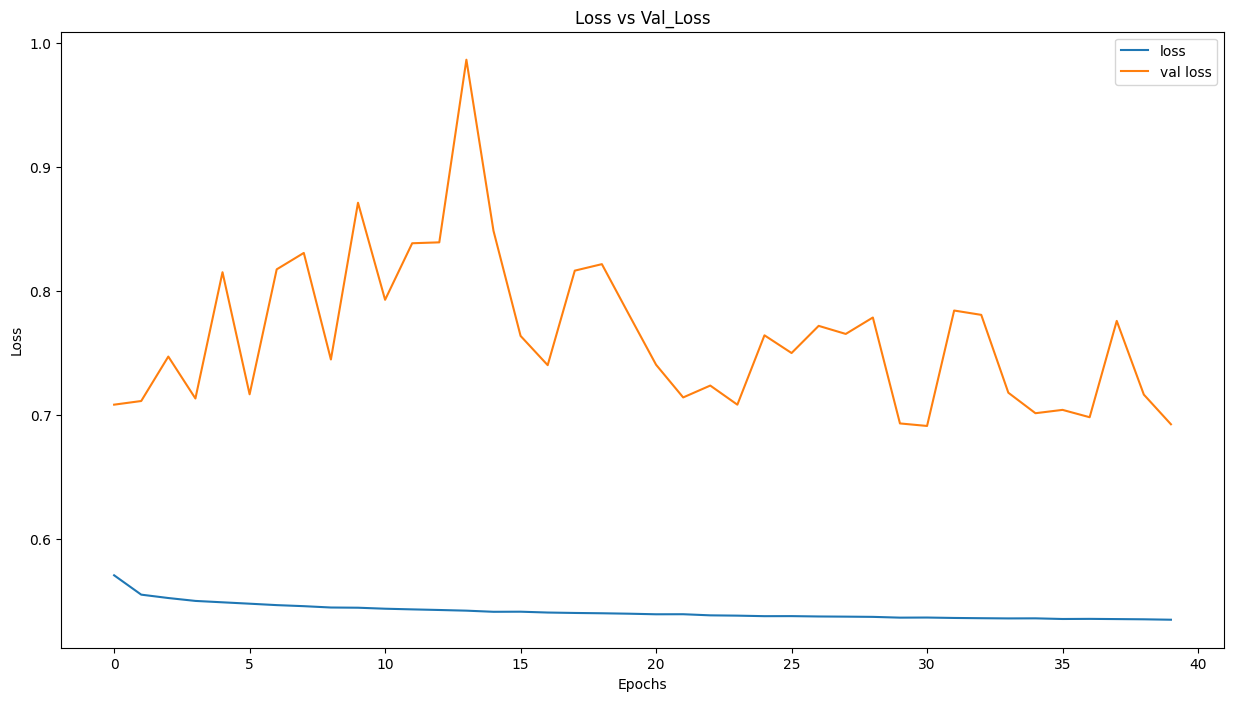

In [84]:
plt.figure(figsize=(15,8))
plt.plot(fit_model.history['loss'], label = 'loss')
plt.plot(fit_model.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [85]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_mse = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5573 - accuracy: 0.7280 - mse: 0.1875 - 398ms/epoch - 2ms/step
Loss: 0.5573179125785828, Accuracy: 0.7279883623123169


<Axes: >

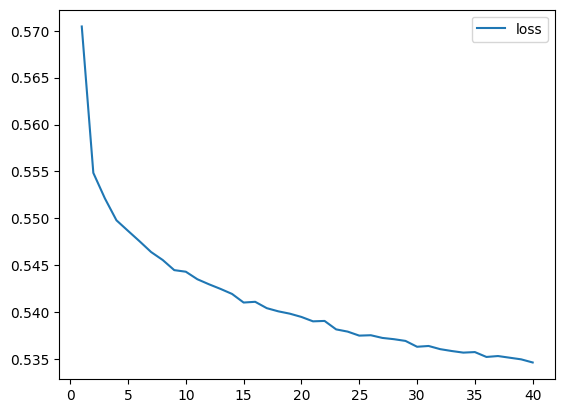

In [86]:
# Evaluate the model using the test data
# Create a DataFrame containing training history
big_model_history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
big_model_history_df.index += 1
# Plot the loss
big_model_history_df.plot(y="loss")

<Axes: >

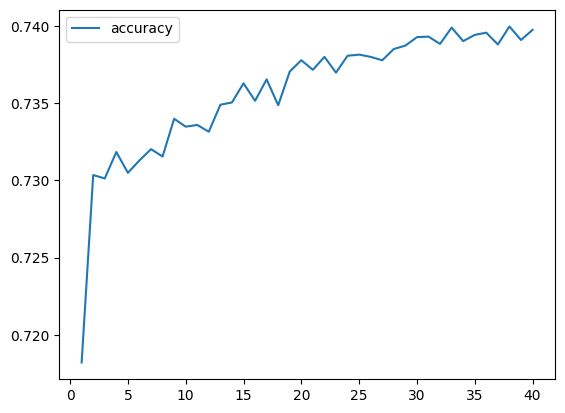

In [87]:
big_model_history_df.plot(y="accuracy")

In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE